#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Practica 9: Regresión Logistica en Brast Cancer Alumno: Ibarra Ramírez Sergio </font>

In [1]:
import pandas as pd

In [1]:
from sklearn.datasets import load_breast_cancer

tabla_breast_cancer = load_breast_cancer(as_frame=True)

In [2]:
tabla_breast_cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Separamos en variable dependiente (y) y variables independientes (X)

In [4]:
y_breast_cancer = tabla_breast_cancer['target']
y_breast_cancer

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [12]:
tabla_breast_cancer['frame'].columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [14]:
X_breast_cancer = tabla_breast_cancer['data'][['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
X_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


Se separa en train y test la data de breast cancer 

In [16]:
## Separacion en train y test 
from sklearn.model_selection import train_test_split

X_breast_cancer_train, X_breast_cancer_test, y_breast_cancer_train, y_breast_cancer_test = train_test_split(X_breast_cancer,y_breast_cancer,test_size=0.2,random_state = 2022)
X_breast_cancer_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
453,14.530,13.98,93.86,644.2,0.10990
153,11.150,13.08,70.87,381.9,0.09754
385,14.600,23.29,93.97,664.7,0.08682
67,11.310,19.04,71.80,394.1,0.08139
528,13.940,13.17,90.31,594.2,0.12480
...,...,...,...,...,...
234,9.567,15.91,60.21,279.6,0.08464
388,11.270,15.50,73.38,392.0,0.08365
384,13.280,13.72,85.79,541.8,0.08363
171,13.430,19.63,85.84,565.4,0.09048


Importamos y usamos el modelo de LogisticRegression 

In [18]:
from sklearn.linear_model import LogisticRegression

modelo_Logistic_Regression = LogisticRegression()
modelo_Logistic_Regression_breast_cancer = modelo_Logistic_Regression.fit(X_breast_cancer_train, y_breast_cancer_train)
modelo_Logistic_Regression_breast_cancer

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

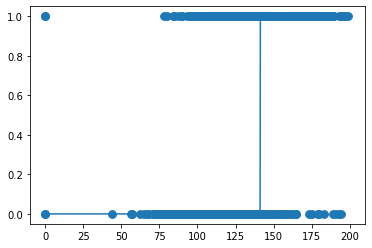

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x_func = np.linspace(0,200,1000)
y_func = modelo.predict(x_func.reshape(-1,1))

x_points = X_train
y_points = y_train

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Delimitamos solo una parte de los datos ('es como da run zoom') 


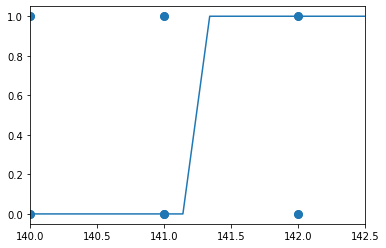

In [8]:
ax.set_xlim([140,142.5])
fig